In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
or_df = pd.read_csv('./datasets/online_retail.csv')

In [3]:
or_df

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


### 1️⃣ 결측치 제거

In [4]:
or_df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           52955 non-null  bool 
 1   CustomerID           52955 non-null  bool 
 2   Gender               52955 non-null  bool 
 3   Location             52955 non-null  bool 
 4   Tenure_Months        52955 non-null  bool 
 5   Transaction_ID       52955 non-null  bool 
 6   Transaction_Date     52955 non-null  bool 
 7   Product_SKU          52955 non-null  bool 
 8   Product_Description  52955 non-null  bool 
 9   Product_Category     52955 non-null  bool 
 10  Quantity             52955 non-null  bool 
 11  Avg_Price            52955 non-null  bool 
 12  Delivery_Charges     52955 non-null  bool 
 13  Coupon_Status        52955 non-null  bool 
 14  GST                  52955 non-null  bool 
 15  Date                 52955 non-null  bool 
 16  Offline_Spend        5

In [5]:
or_df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

### 2️⃣결측치 대체

- coupon_code: na => NOCOUPON
- discount_pct: na => 0
- customerID : 행삭제

In [6]:
or_df['Coupon_Code'].fillna('NOCOUPON', inplace=True)

In [7]:
or_df['Coupon_Code'].isna().sum()

0

In [8]:
or_df['Discount_pct'].fillna(0, inplace=True)

In [9]:
or_df['Coupon_Code'].isna().sum()

0

In [10]:
or_df = or_df.dropna(subset=['CustomerID'])

In [11]:
or_df.isna().sum()

Unnamed: 0             0
CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

### 3️⃣데이터 전처리

- Transaction_Date와 Date가 중복되므로 삭제
- 플랫폼 가입개월수는 데이터에 필요없으므로 삭제
- 온 오프라인 구매비율 칼럼 추가해주기

In [12]:
or_df = or_df.drop(columns=['Date','Tenure_Months'])

In [16]:
# 각 행별로 Offline_Spend에 대비한 Online_Spend의 비율 계산
or_df.loc[:,'Online_Ratio'] = (or_df['Online_Spend'] / (or_df['Online_Spend'] + or_df['Offline_Spend']))*100
or_df.loc[:,'Offline_Ratio'] = 100 - or_df['Online_Ratio'] 

#### 4️⃣RFM과 데이터 분석
1. 거래 날짜 중 가장 최신날짜로 recency
2. 거래 숫자로 freq
3.  avg_price 와 quantity로 총 금액 monetary

**데이터 분석**
- 온오프라인의 거래 비율로 선호하는 거래
- 각 지역별 배달비 비교
- 각 등급별 배달비 비교
- 각 쿠폰 종류별 할인률
- 각 등급별 쿠폰 사용 비율
- 각 물품별 세금비율
- 등급별 선호 물품, 카테고리

In [18]:
or_df.loc[:, 'Total_Spend'] = or_df['Quantity']* or_df['Avg_Price']
or_df

,Unnamed: 0,CustomerID,Gender,Location,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Online_Ratio,Offline_Ratio,Total_Spend
0,0,17850.0,M,Chicago,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
1,1,17850.0,M,Chicago,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
2,2,17850.0,M,Chicago,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,245.54
3,3,17850.0,M,Chicago,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,81.50
4,4,17850.0,M,Chicago,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,52919,13155.0,F,California,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,...,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,34.110305,65.889695,250.00
52920,52920,18077.0,M,Chicago,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,...,Used,0.05,2000.0,1066.12,3,GC30,30.0,34.770981,65.229019,25.00
52921,52921,16085.0,M,California,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,...,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,10.80
52922,52922,16085.0,M,California,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,...,Used,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,9.60


In [19]:
or_df.loc[:,'Transaction_Date'] = pd.to_datetime(or_df['Transaction_Date'])
or_df = or_df.drop(columns=['Unnamed: 0'])
or_df

,CustomerID,Gender,Location,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Online_Ratio,Offline_Ratio,Total_Spend
0,17850.0,M,Chicago,16679.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
1,17850.0,M,Chicago,16680.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
2,17850.0,M,Chicago,16696.0,2019-01-01 00:00:00,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,...,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,245.54
3,17850.0,M,Chicago,16699.0,2019-01-01 00:00:00,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,81.50
4,17850.0,M,Chicago,16700.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,22504.0,2019-03-10 00:00:00,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,...,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,34.110305,65.889695,250.00
52920,18077.0,M,Chicago,24250.0,2019-03-28 00:00:00,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,...,Used,0.05,2000.0,1066.12,3,GC30,30.0,34.770981,65.229019,25.00
52921,16085.0,M,California,39991.0,2019-10-06 00:00:00,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,...,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,10.80
52922,16085.0,M,California,39991.0,2019-10-06 00:00:00,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,...,Used,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,9.60


In [20]:
today = pd.to_datetime('2020.01.01')
or_df.loc[:, 'Recency'] = or_df['Transaction_Date'].apply(lambda x: (today-x).days)
or_df

,CustomerID,Gender,Location,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Online_Ratio,Offline_Ratio,Total_Spend,Recency
0,17850.0,M,Chicago,16679.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,365
1,17850.0,M,Chicago,16680.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,365
2,17850.0,M,Chicago,16696.0,2019-01-01 00:00:00,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,...,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,245.54,365
3,17850.0,M,Chicago,16699.0,2019-01-01 00:00:00,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,...,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,81.50,365
4,17850.0,M,Chicago,16700.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,0.10,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,22504.0,2019-03-10 00:00:00,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,...,0.05,2500.0,1294.22,3,GC30,30.0,34.110305,65.889695,250.00,297
52920,18077.0,M,Chicago,24250.0,2019-03-28 00:00:00,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,...,0.05,2000.0,1066.12,3,GC30,30.0,34.770981,65.229019,25.00,279
52921,16085.0,M,California,39991.0,2019-10-06 00:00:00,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,...,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,10.80,87
52922,16085.0,M,California,39991.0,2019-10-06 00:00:00,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,...,0.05,3000.0,2230.76,10,NJ10,10.0,42.646958,57.353042,9.60,87


In [21]:
or_df['CustomerID'].value_counts()

CustomerID
12748.0    695
15311.0    587
14606.0    575
17841.0    572
14911.0    523
          ... 
17870.0      1
17720.0      1
18113.0      1
12865.0      1
13481.0      1
Name: count, Length: 1468, dtype: int64

In [22]:
or_rfm_df = or_df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Total_Spend': 'sum',
    'Recency': 'min' 
})

In [23]:
or_rfm_df.reset_index(inplace=True)
or_rfm_df

,CustomerID,Quantity,Total_Spend,Recency
0,12346.0,3.0,30.99,108
1,12347.0,342.0,13834.90,60
2,12348.0,209.0,1442.12,74
3,12350.0,21.0,1360.07,18
4,12356.0,56.0,1442.47,108
...,...,...,...,...
1463,18259.0,46.0,544.34,271
1464,18260.0,141.0,2363.05,88
1465,18269.0,10.0,101.56,195
1466,18277.0,2.0,298.00,70


In [24]:
or_rfm_df = or_rfm_df.rename(columns = {'Total_Spend':'Monetary', 'Quantity':'Frequency'})
or_rfm_df

,CustomerID,Frequency,Monetary,Recency
0,12346.0,3.0,30.99,108
1,12347.0,342.0,13834.90,60
2,12348.0,209.0,1442.12,74
3,12350.0,21.0,1360.07,18
4,12356.0,56.0,1442.47,108
...,...,...,...,...
1463,18259.0,46.0,544.34,271
1464,18260.0,141.0,2363.05,88
1465,18269.0,10.0,101.56,195
1466,18277.0,2.0,298.00,70


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
or_rfm_df[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(or_rfm_df[['Recency', 'Frequency', 'Monetary']])
or_rfm_df.describe()

,CustomerID,Frequency,Monetary,Recency
count,1468.000000,1468.000000,1468.000000,1468.000000
mean,15314.386240,0.033103,0.041887,0.396407
std,1744.000367,0.064169,0.066711,0.280047
min,12346.000000,0.000000,0.000000,0.000000
25%,13830.500000,0.003698,0.008578,0.151099
50%,15300.000000,0.012325,0.023038,0.359890
75%,16882.250000,0.036360,0.051581,0.604396
max,18283.000000,1.000000,1.000000,1.000000


In [26]:
or_rfm_df['Recency'] = 1-or_rfm_df['Recency']

In [27]:
or_rfm_df['Total_Score'] = or_rfm_df[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
or_rfm_df

,CustomerID,Frequency,Monetary,Recency,Total_Score
0,12346.0,0.000411,0.000395,0.706044,0.706850
1,12347.0,0.070049,0.182177,0.837912,1.090138
2,12348.0,0.042728,0.018978,0.799451,0.861157
3,12350.0,0.004108,0.017897,0.953297,0.975303
4,12356.0,0.011298,0.018983,0.706044,0.736325
...,...,...,...,...,...
1463,18259.0,0.009244,0.007155,0.258242,0.274641
1464,18260.0,0.028759,0.031106,0.760989,0.820854
1465,18269.0,0.001849,0.001324,0.467033,0.470206
1466,18277.0,0.000205,0.003911,0.810440,0.814556


In [28]:
or_df = pd.merge(or_df,or_rfm_df, on='CustomerID')

In [29]:
or_df = or_df.drop(columns=['Recency_x','Frequency','Monetary','Recency_y'])

In [30]:
import numpy as np

l1, l2, l3, l4 = np.percentile(or_df['Total_Score'], [20,40,70,90])
print(l1, l2, l3, l4 )

0.5536393903799328 0.7947221936497864 1.0400673617908833 1.3166428641220134


In [31]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2       
    return 1

In [32]:
or_df['Level'] = or_df['Total_Score'].apply(get_level)

In [33]:
or_df['Level'] = or_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'diamond','platinum'])
or_df

,CustomerID,Gender,Location,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Online_Ratio,Offline_Ratio,Total_Spend,Total_Score,Level
0,17850.0,M,Chicago,16679.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,0.756211,Silver
1,17850.0,M,Chicago,16680.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,0.756211,Silver
2,17850.0,M,Chicago,16696.0,2019-01-01 00:00:00,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,...,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,245.54,0.756211,Silver
3,17850.0,M,Chicago,16699.0,2019-01-01 00:00:00,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,...,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,81.50,0.756211,Silver
4,17850.0,M,Chicago,16700.0,2019-01-01 00:00:00,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,4500.0,2424.50,1,ELEC10,10.0,35.013358,64.986642,153.71,0.756211,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,16387.0,F,California,39590.0,2019-10-02 00:00:00,GGOEGDHR082199,Google 25 oz Red Stainless Steel Bottle,Drinkware,1.0,13.99,...,3000.0,899.05,10,EXTRA10,10.0,23.058181,76.941819,13.99,0.753719,Silver
52920,16387.0,F,California,39591.0,2019-10-02 00:00:00,GGOEGDHR018499,Google 22 oz Water Bottle,Drinkware,1.0,2.99,...,3000.0,899.05,10,EXTRA10,10.0,23.058181,76.941819,2.99,0.753719,Silver
52921,15797.0,F,California,40896.0,2019-10-17 00:00:00,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1.0,199.00,...,2500.0,1783.56,10,NE10,10.0,41.637330,58.362670,199.00,0.796563,Gold
52922,16138.0,F,California,23063.0,2019-03-16 00:00:00,GGOEGHGC019799,Google Sunglasses,Lifestyle,1.0,2.80,...,2000.0,2435.12,3,EXTRA30,30.0,54.905392,45.094608,2.80,0.203320,Bronze


In [35]:
# 각 지역별 배송료 계산
shipping_costs_by_location = or_df.groupby('Location')['Delivery_Charges'].mean()
shipping_costs_by_location

Location
California       10.718275
Chicago          10.507412
New Jersey        9.496165
New York         10.698711
Washington DC    10.344374
Name: Delivery_Charges, dtype: float64

In [123]:
or_df['Product_Category'].value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

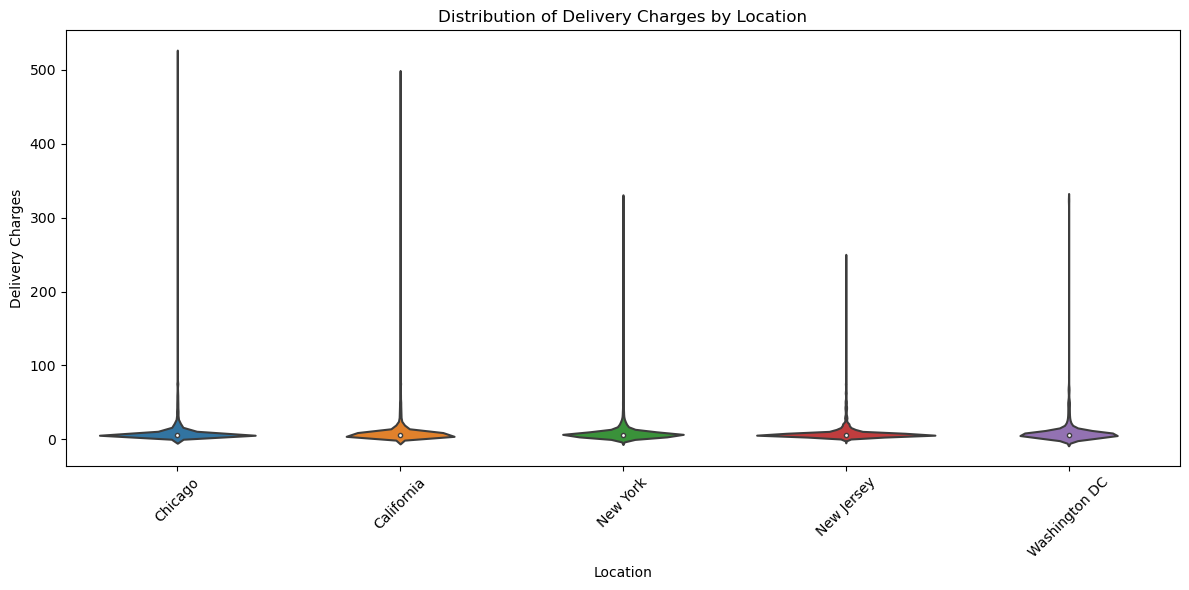

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=or_df, x='Location', y='Delivery_Charges')
plt.title('Distribution of Delivery Charges by Location')
plt.xlabel('Location')
plt.ylabel('Delivery Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# 각 등급별 배송료 계산
shipping_costs_by_level = or_df.groupby('Level')['Delivery_Charges'].mean()
shipping_costs_by_level

Level
Bronze      11.456866
Gold         9.818968
Silver      10.123504
diamond     10.237454
platinum    12.128890
Name: Delivery_Charges, dtype: float64

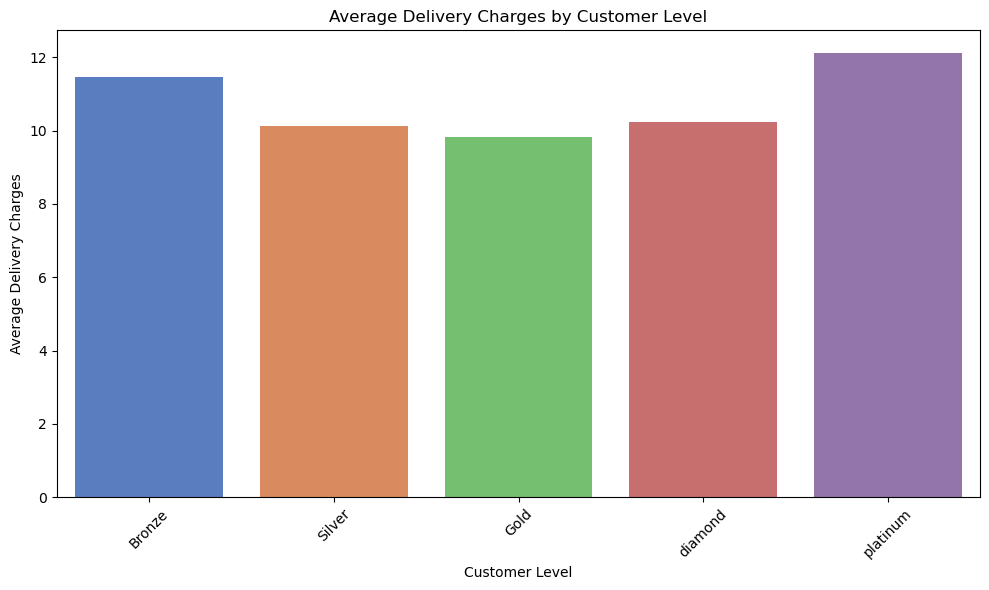

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급 순서 설정
level_order = ['Bronze', 'Silver', 'Gold', 'diamond', 'platinum']

# 등급별 배송료 계산
shipping_costs_by_level = or_df.groupby('Level')['Delivery_Charges'].mean()
shipping_costs_by_level

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_costs_by_level.index, y=shipping_costs_by_level.values, order=level_order, palette='muted')
plt.title('Average Delivery Charges by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Average Delivery Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


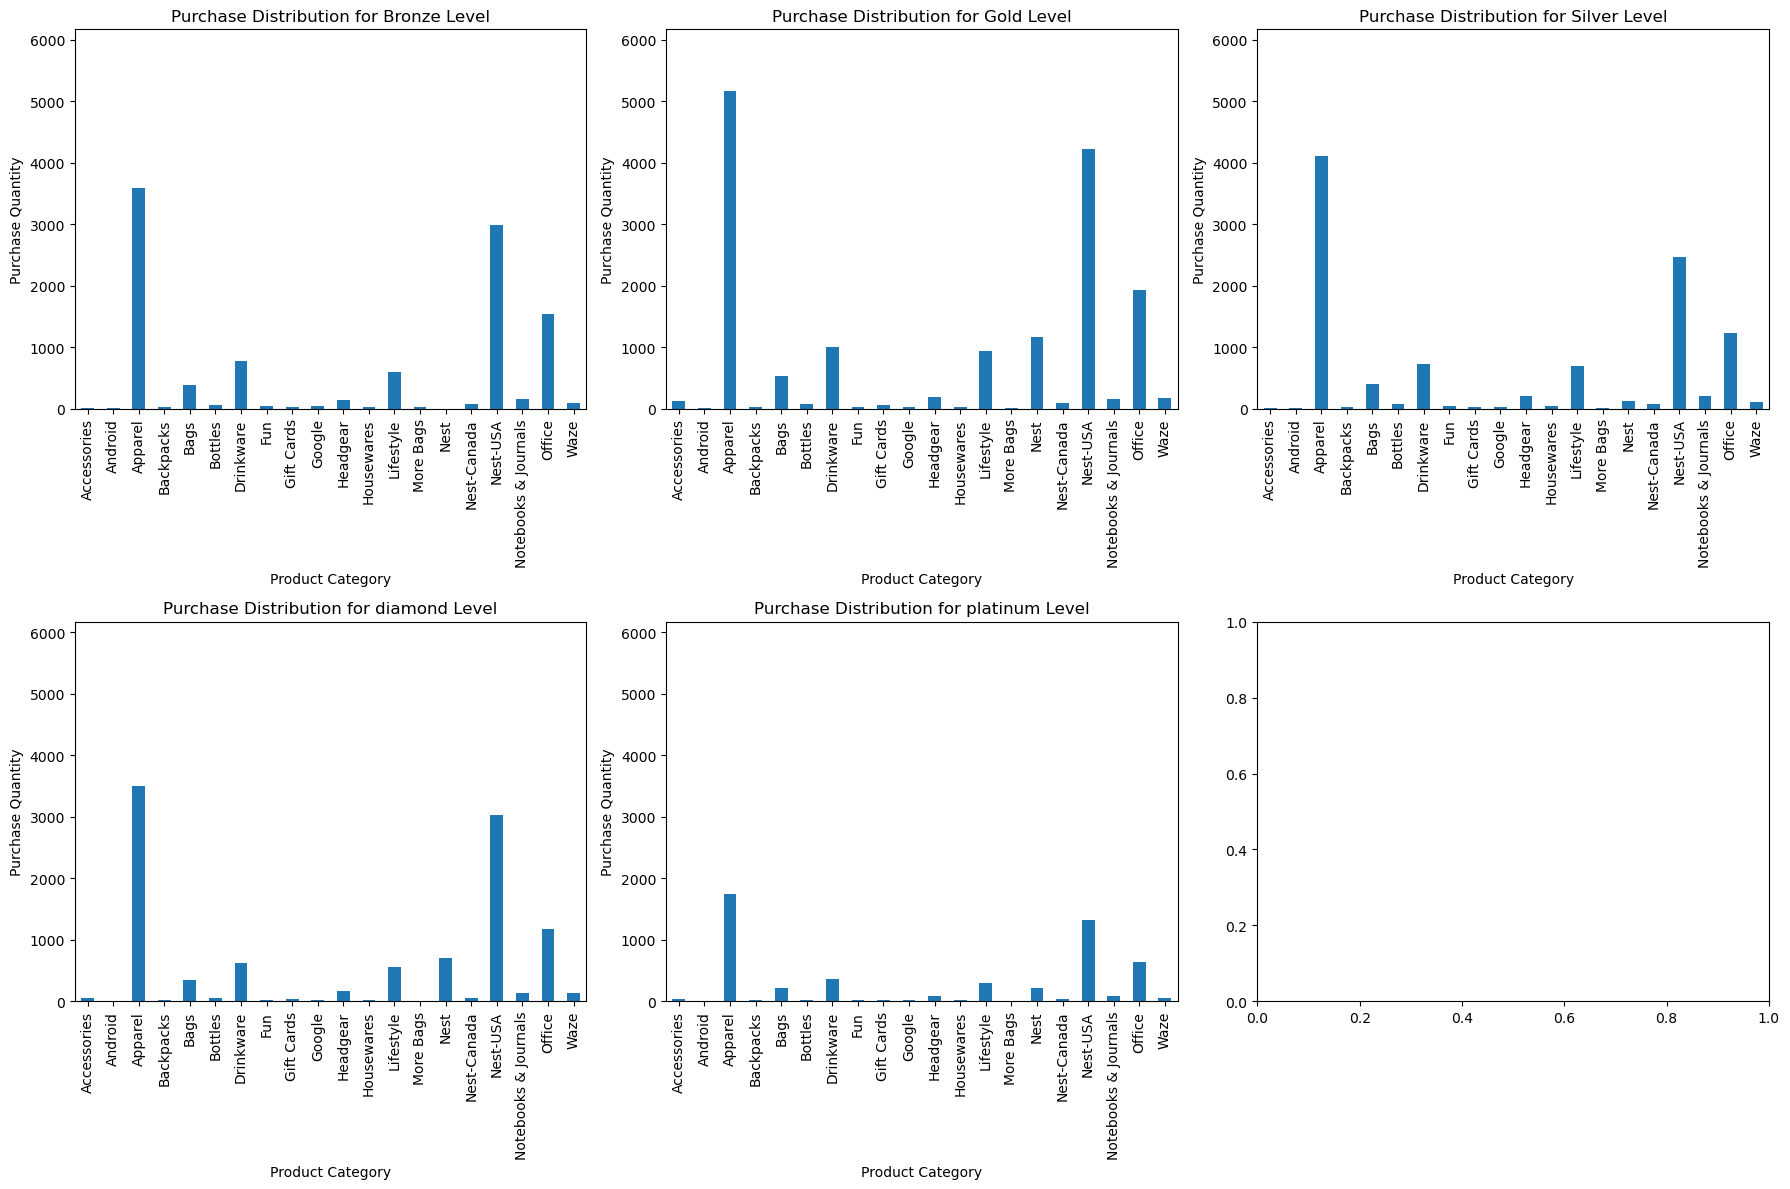

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 각 물품 카테고리의 구매 수량 계산
category_purchase_by_level = or_df.groupby(['Level', 'Product_Category']).size().unstack()

# 최대 구매 수량 계산
max_purchase_quantity = category_purchase_by_level.max().max()+1000

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, level in enumerate(category_purchase_by_level.index):
    row = i // 3
    col = i % 3
    category_purchase_by_level.loc[level].plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'Purchase Distribution for {level} Level')
    axes[row, col].set_xlabel('Product Category')
    axes[row, col].set_ylabel('Purchase Quantity')
    axes[row, col].set_ylim(0, max_purchase_quantity)  # y 축 범위 설정
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

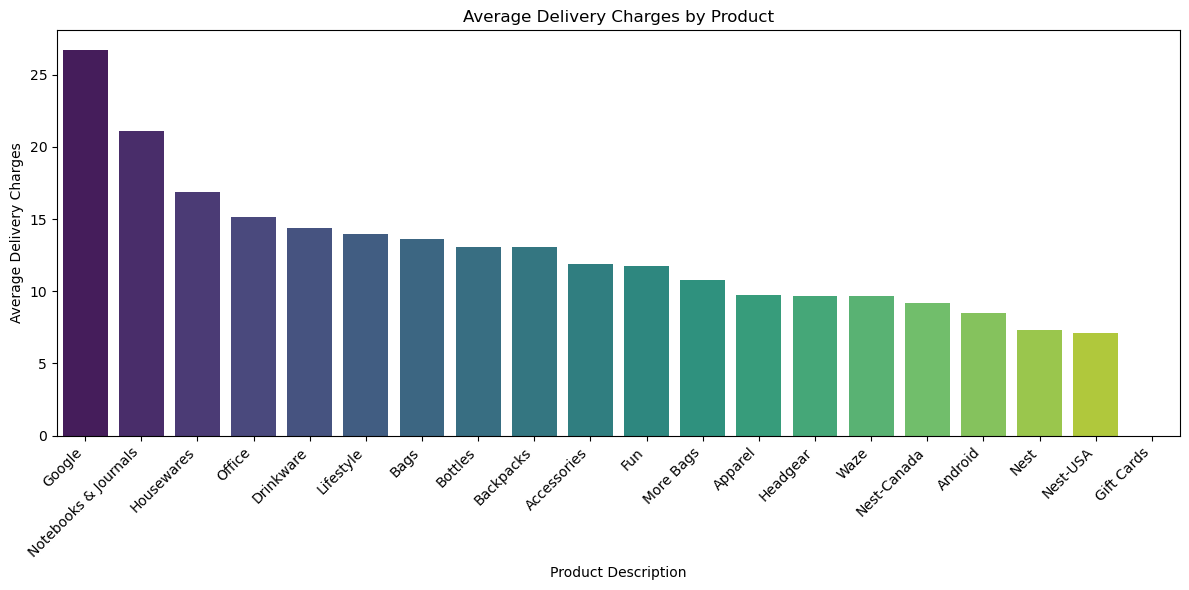

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 물품별 평균 배송료 계산
shipping_costs_by_product = or_df.groupby('Product_Category')['Delivery_Charges'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=shipping_costs_by_product.index, y=shipping_costs_by_product.values, palette='viridis')
plt.title('Average Delivery Charges by Product')
plt.xlabel('Product Description')
plt.ylabel('Average Delivery Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


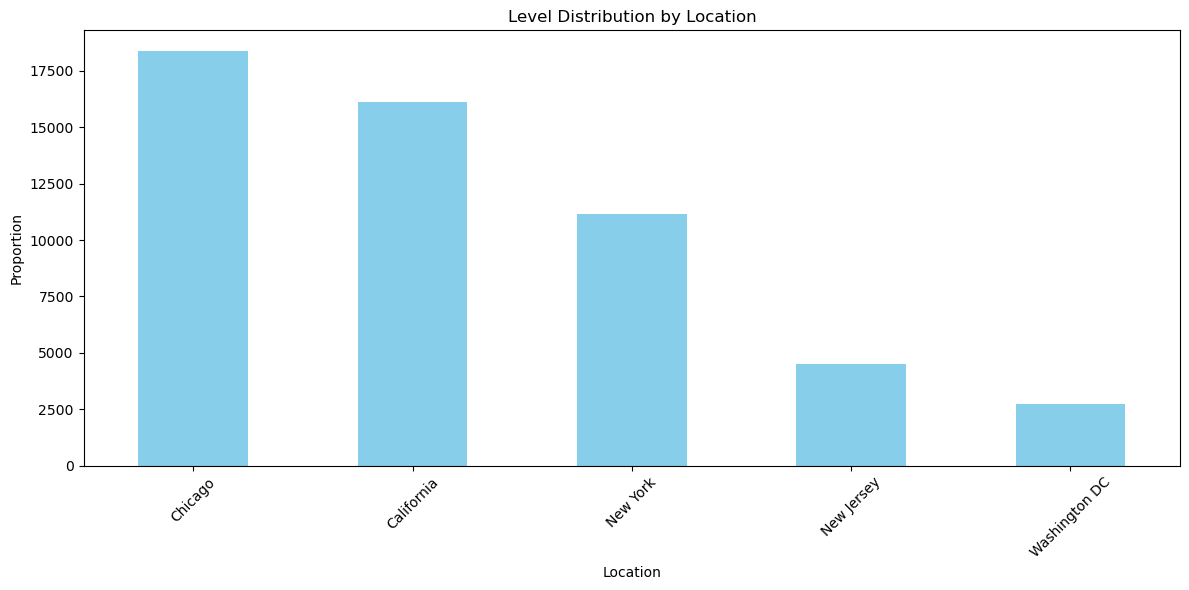

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# 거주지 별 등급 분포 계산
level_distribution_by_location = or_df['Location'].value_counts(normalize=False)

# 시각화
plt.figure(figsize=(12, 6))
level_distribution_by_location.plot(kind='bar', color='skyblue')
plt.title('Level Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

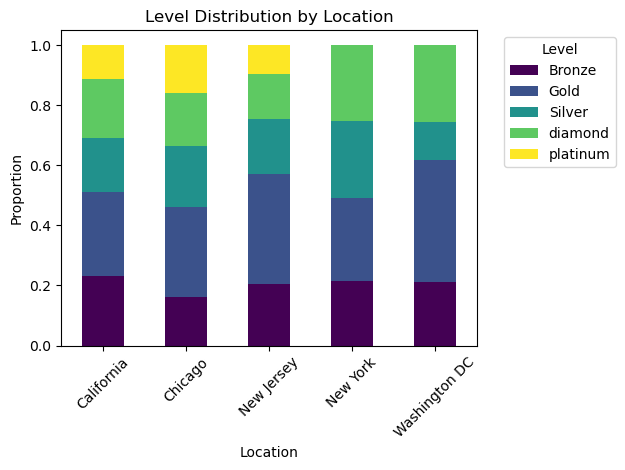

In [69]:
import matplotlib.pyplot as plt

# 각 거주지 별 등급 분포 계산
level_distribution_by_location = or_df.groupby('Location')['Level'].value_counts(normalize=True).unstack()
level_distribution_by_location

import seaborn as sns
import matplotlib.pyplot as plt

# 거주지 별 등급 분포 계산
level_distribution_by_location = or_df.groupby('Location')['Level'].value_counts(normalize=True).unstack()

# 시각화
plt.figure(figsize=(12, 6))
level_distribution_by_location.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Level Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


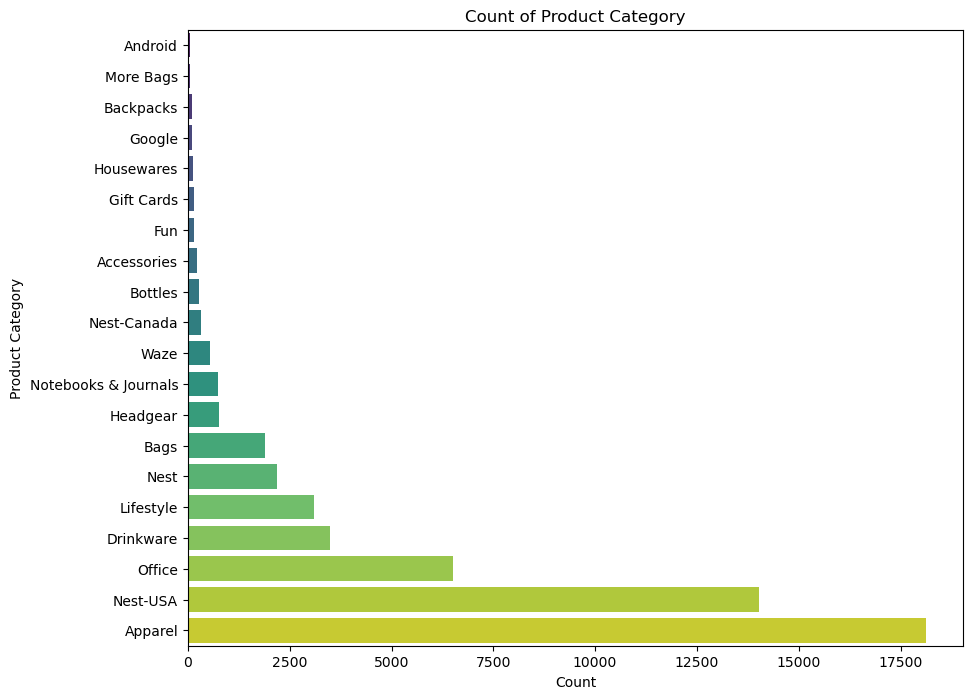

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Product_Category의 값 카운트하여 정렬
Category = or_df['Product_Category'].value_counts().sort_values(ascending=True)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=Category.values, y=Category.index, palette='viridis')
plt.title('Count of Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


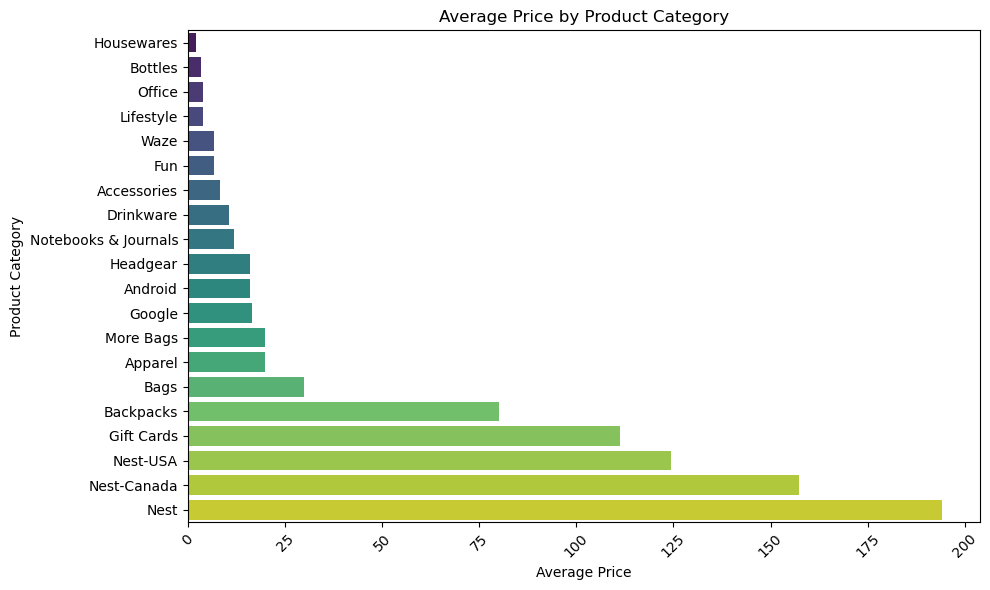

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# 물품 카테고리별 평균 가격 계산
average_price_by_category = or_df.groupby('Product_Category')['Avg_Price'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_category.values, y=average_price_by_category.index, palette='viridis')
plt.title('Average Price by Product Category')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


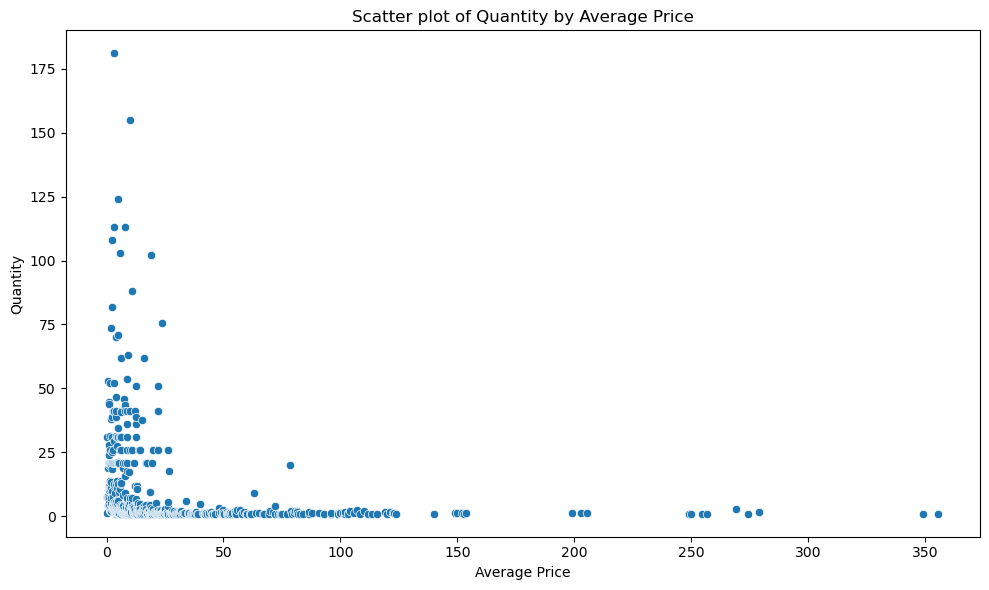

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 평균 가격별 구매 수량 계산
average_price_quantity = or_df.groupby('Avg_Price')['Quantity'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_price_quantity, x='Avg_Price', y='Quantity')
plt.title('Scatter plot of Quantity by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


### 📌 배송료와 물건 구매수량에 대한 분석
- 각 지역별 배송료는 평균 11달러정도로 비슷하다
- 각 등급별 배송료를 보면 골드 등급이 가장 낮고 플랫티넘 등급이 가장 높다
- 이는 물건 구매 수량과 밀접한 관련이 있다.
- **물건 구매량이 많은 골드 등급을 대상으로 배송비 무료 프로모션을 진행한다.**
- **등급이 승급될 수록 배송비를 할인해주는 이벤트또한 효과적일 수 있다.**
- **특히 각 등급에서 가장많은 수량을 기록한 의류 관련 제품에 대해 진행할 수 있다.**
- **상대적으로 상위 등급 분포가 적은 뉴저지와 워싱턴 DC를 대상으로 배송료 이벤트를 진행하여 각 등급의 소비를 촉진시킬 수 있다.**

- 각 등급은 비슷한 양상의 구매 패턴을 보인다.
- 가장 구매량이 낮은 안드로이드, 배낭과 기타가방, 구글 관련 제품, 주방 용품 및 가전용품에 대해서 개선이 필요하다.
- 특히 의류의 구매량이 압도적으로 많은것에 대비하여 배낭과 가방의 구매율이 낮은것은 전시하는 상품을 다시고려해 보아야할 요소이다. 
- 가방의 전체적인 가격을 의류 소비가 가장 많은 골드등급의 평균 지출과 선호도를 조사하여 개선할 수 있다.
- 또한 구글과 안드로이드 관련 제품을 묶어 프로모션을 진행하여 판매를 촉진시킬 수 있다.

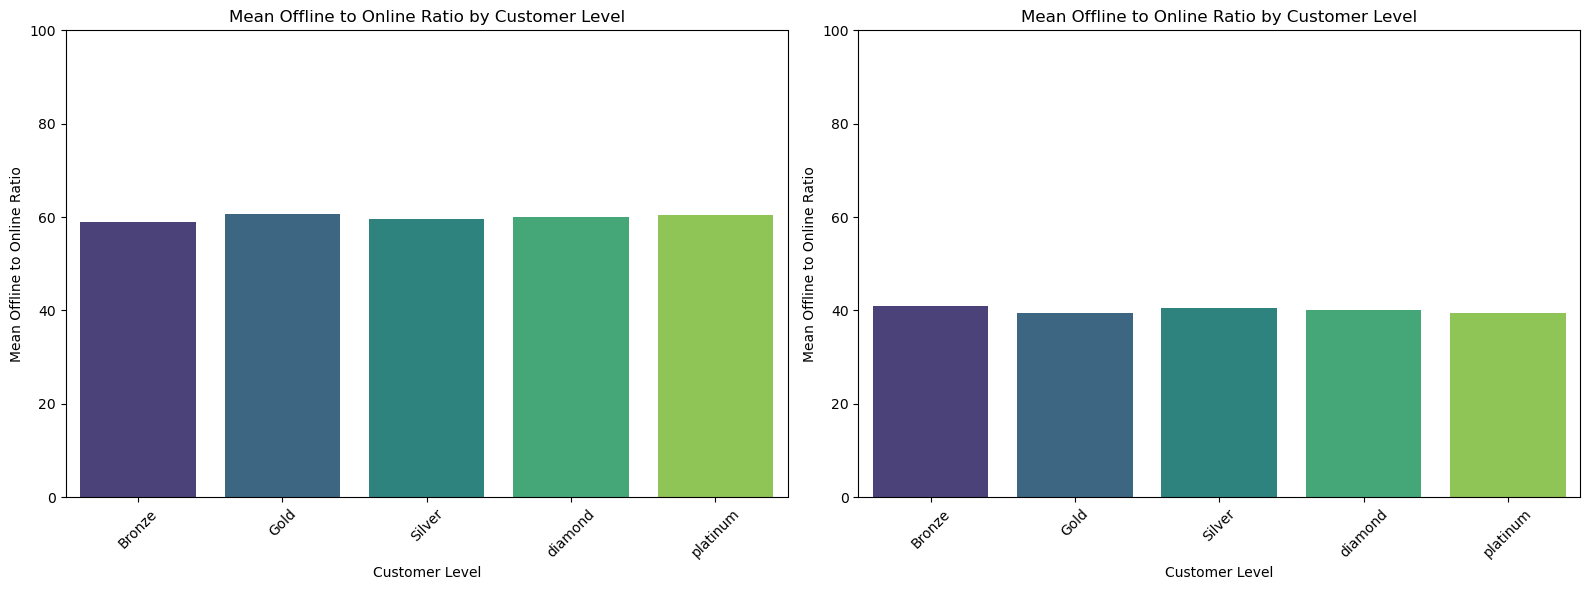

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 오프라인에서 온라인 거래 비율 계산
spend_ratio_by_level = or_df.groupby('Level')[['Offline_Ratio', 'Online_Ratio']].mean().reset_index()

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 왼쪽 그래프: 오프라인 거래 비율
sns.barplot(data=spend_ratio_by_level, x='Level', y='Offline_Ratio', palette='viridis', ax=axes[0])
axes[0].set_title('Mean Offline to Online Ratio by Customer Level')
axes[0].set_xlabel('Customer Level')
axes[0].set_ylabel('Mean Offline to Online Ratio')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)  # y축 범위 맞춤

# 오른쪽 그래프: 온라인 거래 비율
sns.barplot(data=spend_ratio_by_level, x='Level', y='Online_Ratio', palette='viridis', ax=axes[1])
axes[1].set_title('Mean Offline to Online Ratio by Customer Level')
axes[1].set_xlabel('Customer Level')
axes[1].set_ylabel('Mean Offline to Online Ratio')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)  # y축 범위 맞춤

plt.tight_layout()
plt.show()


### 📌온 오프라인 구매 경향에 대한 분석
- 각 등급은 오프라인 보다 온라인 구매를 선호한다.
- 이는 약 6:4 비율을 보인다.
- **온 오프라인을 병행하는 기업에게 이정도 비율이 적당하다고 판단된다**

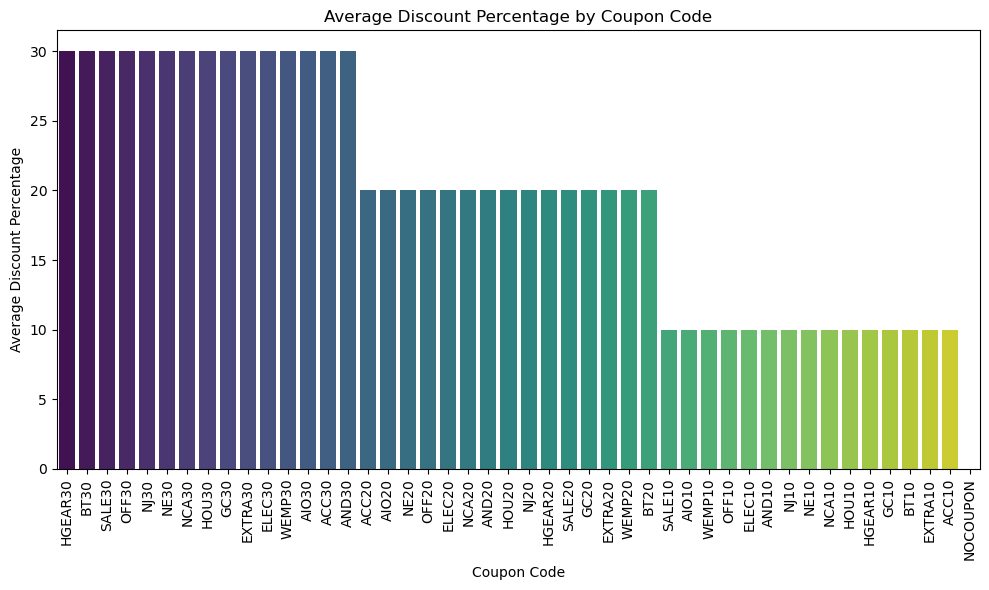

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# 쿠폰 종류별 할인율 계산
coupon_discounts = or_df.groupby('Coupon_Code')['Discount_pct'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_discounts.index, y=coupon_discounts.values, palette='viridis')
plt.title('Average Discount Percentage by Coupon Code')
plt.xlabel('Coupon Code')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


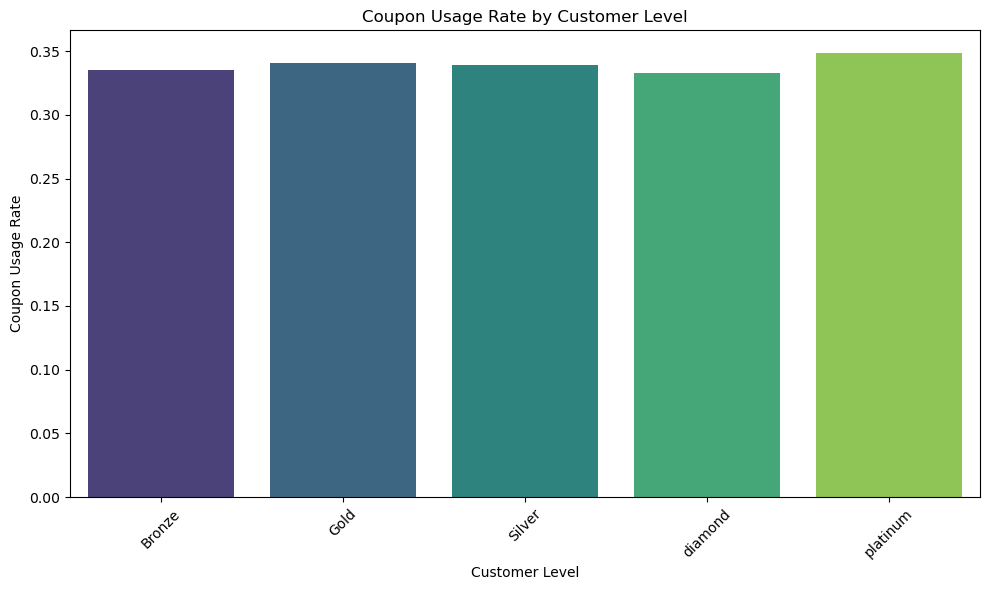

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 쿠폰 사용 여부 계산
coupon_usage_by_level = or_df.groupby('Level')['Coupon_Status'].apply(lambda x: (x == 'Used').mean()).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=coupon_usage_by_level, x='Level', y='Coupon_Status', palette='viridis')
plt.title('Coupon Usage Rate by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Coupon Usage Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


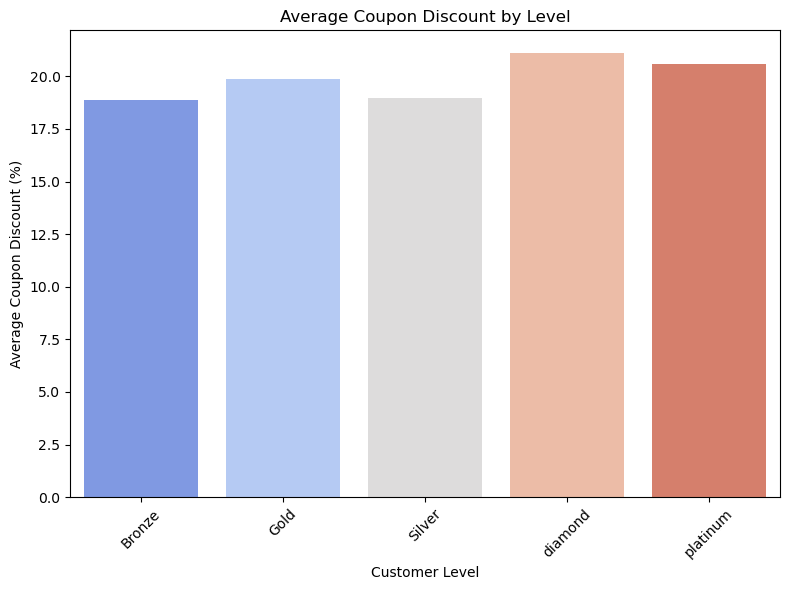

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 쿠폰 할인률의 평균 계산
average_discount_by_level = or_df.groupby('Level')['Discount_pct'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=average_discount_by_level.index, y=average_discount_by_level.values, palette='coolwarm')
plt.title('Average Coupon Discount by Level')
plt.xlabel('Customer Level')
plt.ylabel('Average Coupon Discount (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


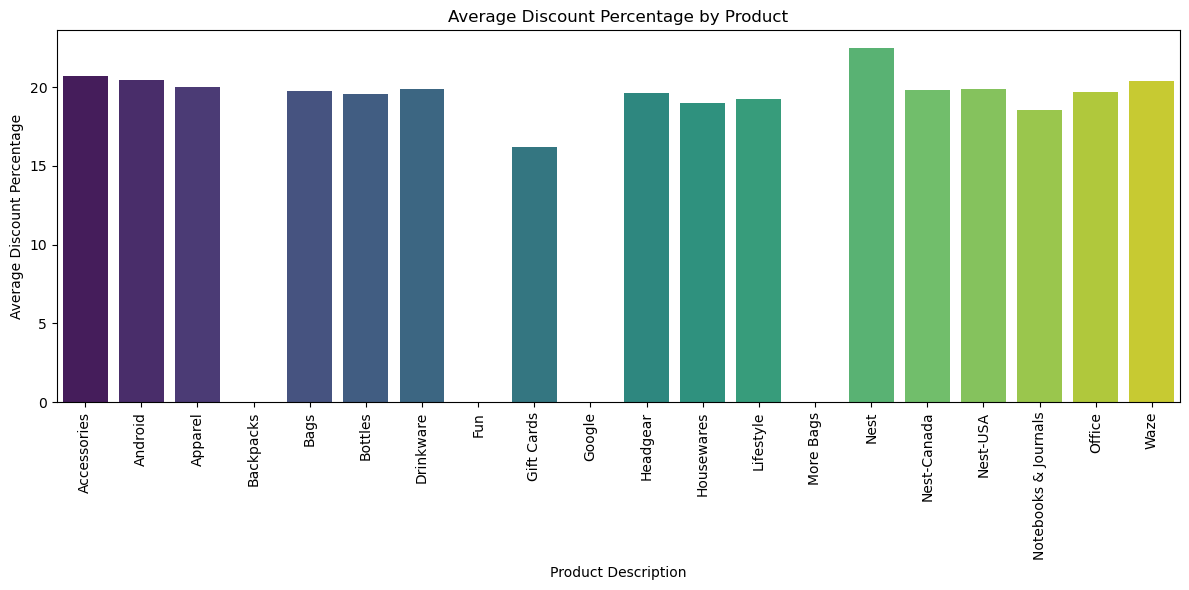

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# 품목 별 평균 할인율 계산
discount_by_product = or_df.groupby('Product_Category')['Discount_pct'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_by_product, x='Product_Category', y='Discount_pct', palette='viridis')
plt.title('Average Discount Percentage by Product')
plt.xlabel('Product Description')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 📌쿠폰 할인률과 사용에 대한 분석
- 쿠폰의 사용도는 각 등급별로 비슷하다.
- 쿠폰의 할인률은 다이아->플랫티넘 순으로 높지만 이 또한 18~22% 사이의 비슷한 양상을 보인다.
- **각 등급에 대해 쿠폰팩을 차등 지급하여 구매를 촉진 시키고, 승급에 대한 니즈를 충족시킬 수 있다.**
- 가장 가격대가 있는 nest 상품에 할인을 가장 많이 적용하였다.
- 구글, 백팩, 기타가방, 재미에 대한용품은 판매량이 저조했을 뿐아니라 사람들의 할인 적용률도 저조하다.
- **해당 카테고리에 대해서 할인프로모션을 진행하여 구매에 변화가 있는지 확인 후 카테고리의 변화가 필요한 지 파악해야한다.**

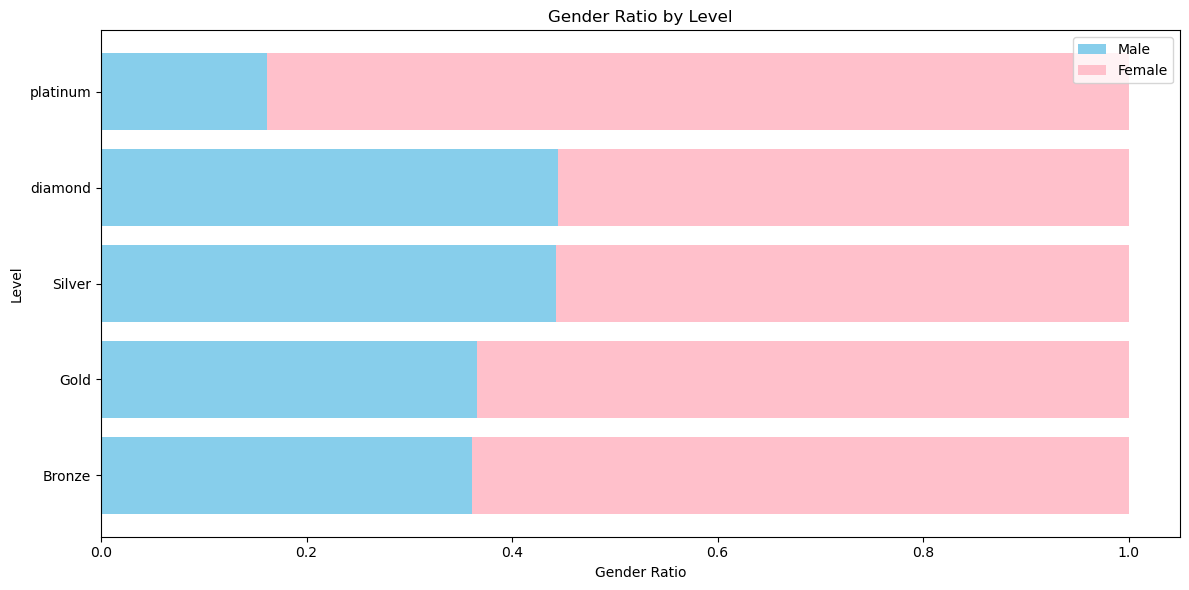

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 남성 수 계산
male_count_by_level = or_df[or_df['Gender'] == 'M'].groupby('Level')['CustomerID'].count()

# 등급별 여성 수 계산
female_count_by_level = or_df[or_df['Gender'] == 'F'].groupby('Level')['CustomerID'].count()

# 등급별 전체 고객 수 계산
total_count_by_level = or_df.groupby('Level')['CustomerID'].count()

# 남성 비율 계산
male_ratio_by_level = male_count_by_level / total_count_by_level

# 여성 비율 계산
female_ratio_by_level = female_count_by_level / total_count_by_level

# 시각화
plt.figure(figsize=(12, 6))

# 남성 그래프 그리기
plt.barh(male_ratio_by_level.index, male_ratio_by_level.values, color='skyblue', label='Male')

# 여성 그래프 그리기
plt.barh(female_ratio_by_level.index, female_ratio_by_level.values, left=male_ratio_by_level.values, color='pink', label='Female')

plt.title('Gender Ratio by Level')
plt.xlabel('Gender Ratio')
plt.ylabel('Level')
plt.legend()
plt.tight_layout()
plt.show()


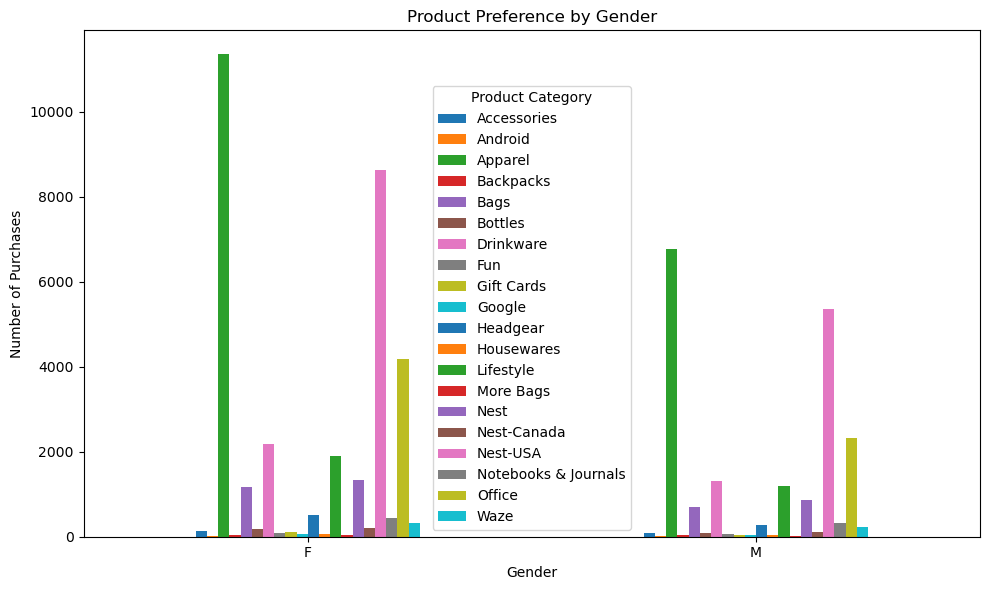

In [99]:
import pandas as pd

# 성별에 따른 제품 카테고리 선호도 분석
product_preference_by_gender = or_df.groupby(['Gender', 'Product_Category'])['CustomerID'].count().unstack()

# 시각화
product_preference_by_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Product Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


### 📌 성별 구매 선호도 분석
- 각 등급별로 여성이 많은 비율을 차지하고 있다.
- 특히 플래티넘의 대다수는 여성회원이다.
- 남녀 회원은 비슷하 양상의 구매패턴을 보인다. 의류와 네스트 USA 구매량이 가장 많다.
- **남성회원의 비율과 판매량을 촉진시키기 위해서 남성 전용 카테고리를 추가하여 접근성을 높이는 방법이 있다.**
- **각 카테고리에서 남성이 선호하는 상품위주로 전용 카테고리 관을 추가한다.**


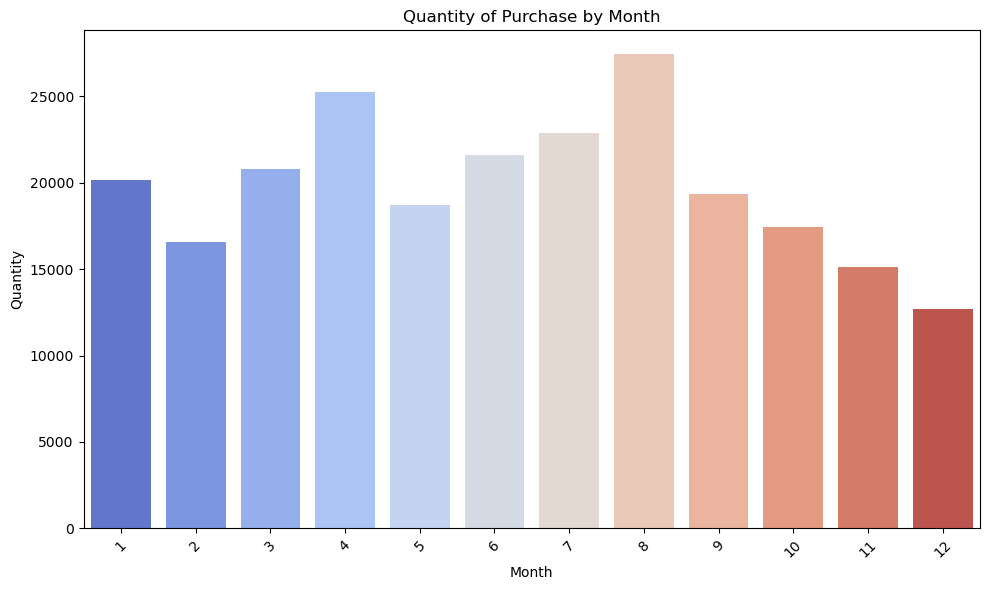

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 달별 구매 수량 계산
monthly_purchase = or_df.groupby('Transaction_Month')['Quantity'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_purchase, x='Transaction_Month', y='Quantity', palette='coolwarm')
plt.title('Quantity of Purchase by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


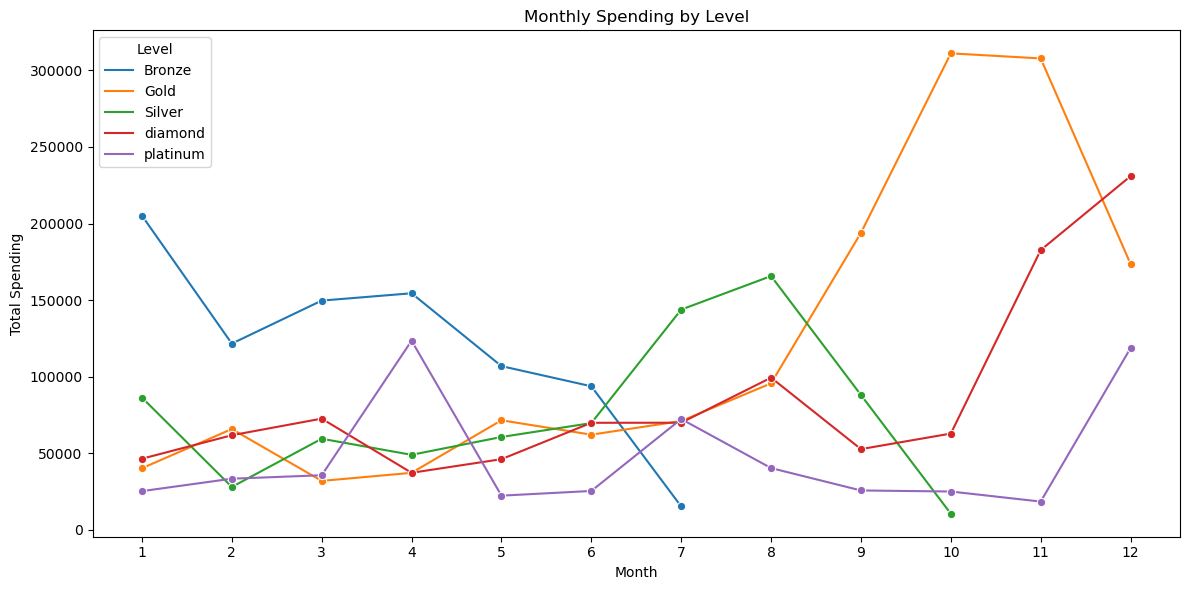

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
# 'Transaction_Date' 열을 datetime 형식으로 변환
or_df['Transaction_Date'] = pd.to_datetime(or_df['Transaction_Date'])

# 거래날짜를 월로 변환
or_df['Transaction_Month'] = or_df['Transaction_Date'].dt.month

# 각 등급별 월별 사용금액 계산
monthly_spending_by_level = or_df.groupby(['Level', 'Transaction_Month'])['Total_Spend'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_spending_by_level, x='Transaction_Month', y='Total_Spend', hue='Level', marker='o')
plt.title('Monthly Spending by Level')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


### 📌월별 구매 패턴 분석
- 각 월별 구매수량을 보면 8월이 가장 구매도가 높고 12월이 가장 저조한 것을 볼 수 있다.
- 각 등급별 월별 구매수량을 분석하면 다음과 같다
- 브론즈 등급은 7월까지 구매가 서서히 감소하며 그 이후 구매량이 없다.
- 플래티넘의 경우 4월 과 12월에 많은 구매를 보인다.
- 실버등급의 경우 8월까지 구매량이 상승하다 10월 이후의 구매량이 없다.
- 골드 등급의 경우 10월까지 구매량이 상승하고 12월에 낮아지는 패턴을 보인다.
- 다이아 등급의 경우 구매량이 꾸준히 상승한다.

- **이를 바탕으로 구매량이 저조한 12월 특별 상품을 게시하여 판매를 촉진 시킬 수 있다.**
- 각 등급의 구매량이 많아지는 월이 다양하므로 해당 월에 집중적으로 해당 등급에 대한 프로모션을 진행한다.
- **1월- 브론즈, 4월 12월- 플랫티넘, 8월-실버, 9월 10월- 골드, 12월- 다이아**

## 💡결론
- 물건 구매량이 많은 골드 등급을 대상으로 배송비 무료 프로모션을 진행하여 구매욕구와 추성도를 높인다.
- 고객의 등급 별 배송비 할인 쿠폰을 차등 지급하여 등급 승급을 유도한다
- 남성 회원의 비율과 판매량을 촉진시키기 위해 남성 전용 카테고리를 추가하여 접근성을 높인다.
- 구매량이 저조한 12월에 특별 상품을 게시하여 판매를 촉진한다.
- 월별 등급별 구매량이 다양한 패턴을 보이므로 해당 월에 집중적으로 등급별 프로모션을 진행한다. 이를 통해 특정 월에는 등급별 프로모션을 최적화하여 판매량을 극대화할 수 있다.